In [1]:
import matplotlib.pyplot as plt
import numpy as np
from custom_sepsis import *


In [18]:
policy = random_policy()
episode = run_episode(policy)

In [19]:
for i, state in enumerate(episode.visited[:-1]):
    action = ACTIONS[policy[state]]
    next_state = STATES[episode.visited[i+1]]
    print(action.abx == next_state.abx and action.vaso == next_state.vaso and action.vent == next_state.vent)
    

True


In [2]:
state = STATES[7]# random_initial_state()
state

State(hr=<Level.LOW: -1>, bp=<Level.LOW: -1>, o2=<Level.LOW: -1>, glu=<Level.SUPER_LOW: -2>, diabetic=True, abx=False, vaso=False, vent=False)

In [3]:
action = ACTIONS[len(ACTIONS) - 1]
action

Action(abx=False, vaso=False, vent=False)

In [4]:
fluctuations = [state_to_index[get_next_state(TRUE_ENV_PARAMS, state, action)] for _ in range(100)]
fluctuations

[7,
 7,
 7,
 7,
 7,
 487,
 7,
 7,
 7,
 23,
 7,
 23,
 7,
 7,
 23,
 7,
 7,
 7,
 503,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 263,
 7,
 7,
 7,
 7,
 23,
 7,
 103,
 7,
 7,
 7,
 23,
 7,
 7,
 7,
 7,
 7,
 23,
 7,
 87,
 7,
 487,
 7,
 7,
 23,
 7,
 7,
 167,
 7,
 7,
 7,
 7,
 7,
 7,
 487,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 167,
 7,
 7,
 7,
 23,
 7,
 23,
 7,
 7,
 7,
 7,
 7,
 87,
 7,
 7,
 7,
 487,
 7,
 7,
 23,
 167,
 7,
 23,
 7,
 183,
 23,
 23,
 7]

In [5]:
policy = random_policy()

In [6]:
episode = run_episode(policy)

In [7]:
episode.visited

[1007, 1007]

In [8]:
episode.rewards

[-1]

In [2]:
# dqn_training = train_dqn(true_env, 100_000, "Test")
dqn_training = Training.load("data/trainings/DQN-Test_object.pkl")

In [13]:
# ppo_training = train_ppo(true_env, 100_000, "Test")
ppo_training = Training.load("data/trainings/PPO-Test_object.pkl")

Failed to load DQN model: 'ActorCriticPolicy' object has no attribute 'q_net'. Trying to load PPO model.


In [ ]:
# to test whether one model has a unique policy

import hashlib

def hash_policy(policy):
    policy_str = ''.join(map(str, policy))
    return hashlib.md5(policy_str.encode()).hexdigest()

# Hash the policies
hashed_policies = [hash_policy(get_pol(training)) for _ in range(100)]

# Find differences
unique_hashes = set(hashed_policies)
print(f"Number of unique policies: {len(unique_hashes)}")


# output: Number of unique policies: 1

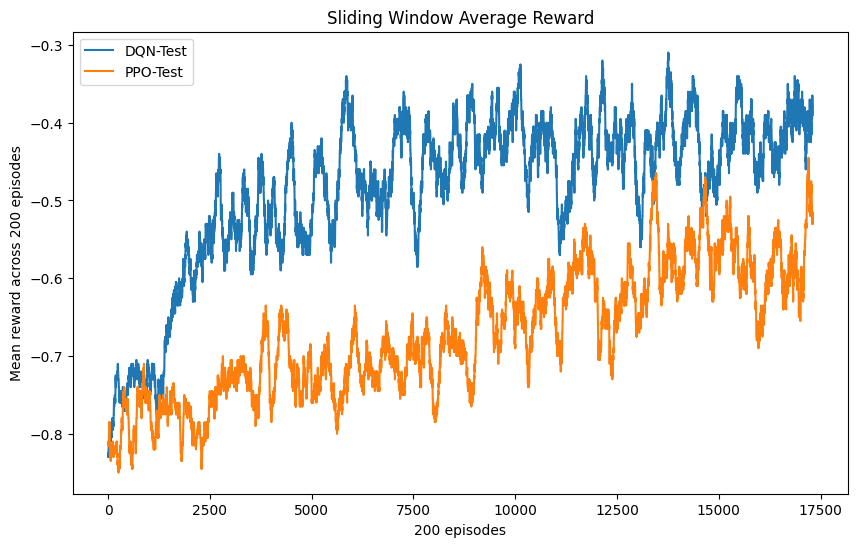

In [12]:
plot_rewards([dqn_training, ppo_training], len(dqn_training.episodes), 200)

In [13]:
dqn_training.evaluate_policy(100000)


-0.37948

In [15]:
ppo_training.evaluate_policy(100000)

-0.47961

In [34]:
dqn_1M_training = train_dqn(true_env, 1_000_000, "Test-1M")
# dqn_1M_training = Training.load("data/trainings/DQN-Test-1M_object.pkl")
ppo_1M_training = train_ppo(true_env, 1_000_000, "Test-1M")
# ppo_1M_training = Training.load("data/trainings/PPO-Test-1M_object.pkl")


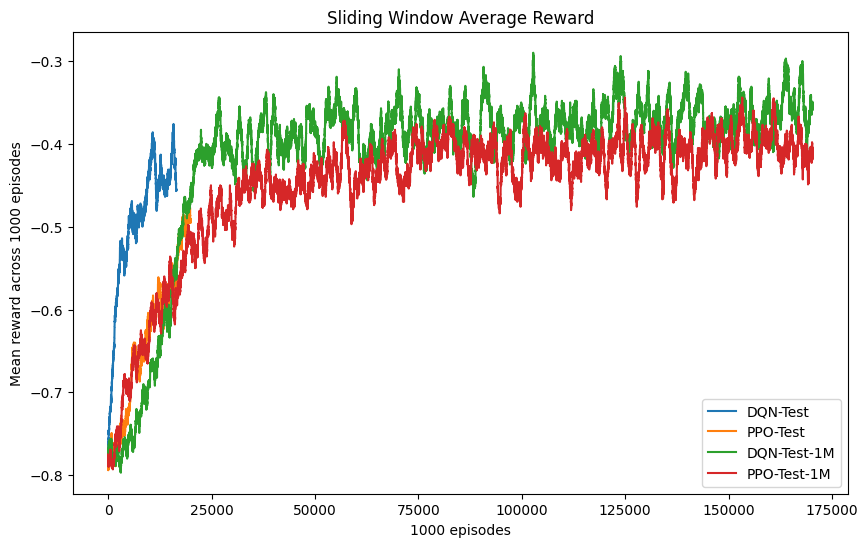

In [ ]:
train.plot_rewards([dqn_training, ppo_training, dqn_1M_training, ppo_1M_training], len(dqn_1M_training.episodes), 1000)
